In [28]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pickle

plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.facecolor': 'white'})
plt.rcParams.update({'savefig.facecolor': 'white'})
plt.rcParams.update({'lines.linewidth': 1.0})
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

nsample = '2048'
cases=['FC500','W005_C500_NO_COR']
case = cases[1] # TODO: loop on cases

with open('outputs/sobol_'+case+'_'+nsample, 'rb') as handle:
# with open('outputs/sobol_beta1_ap0_'+nsample, 'rb') as handle:
    output = pickle.load(handle)


saving_path = 'figures/analysis_of_variance_'+case+nsample+'.png'

true_name={'Cent': r'$\beta_1$',
            'Cdet': r'$\beta_2$',
            'wp_a': r'$a$',
            'wp_b': r'$b$',
            'wp_bp': r'$b$',
            'up_c': r'$C_u$',
            'vp_c': r'$C_v$',
            'bc_ap': r'$a_p^0$',
            'delta_bkg': r'$\delta_0$',
            'wp0': r'$w_p^0$' }

KeyError: 'temp'

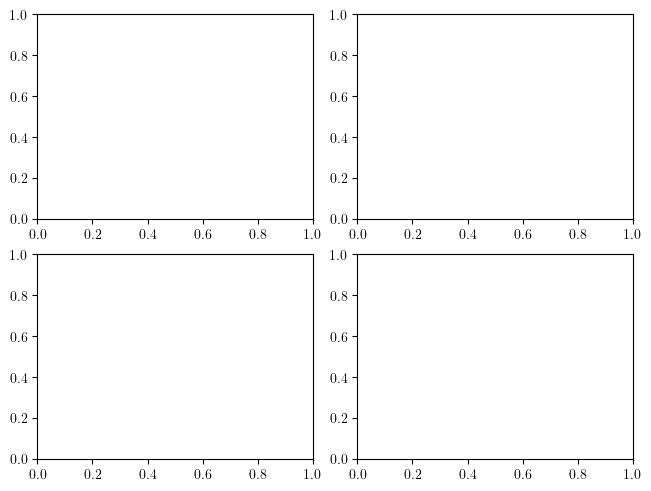

In [30]:
#=============== Plot only THETA =====================
if case != 'W005_C500_NO_COR':
    # fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), sharex=False)
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6.4,4.8), constrained_layout=True, sharex=False)
    i=-1

    field = 'temp'
    #====================================
    i+=1
    ax=axs.flat[i]
    xmin = -1e-5
    xmax = 0.00025
    zlim = -400

    colors = []

    z_r = output[case]['z_r']

    for parameter in output[case]['sobol_indices']:
        variance=output[case]['sobol_indices'][parameter][field]['enumerator_z']
        # variance=output[case]['sobol_indices'][parameter][field]['z index']
        p = ax.plot(variance, z_r, label=true_name[parameter]+' contribution' )
        colors.append(p[0].get_color())
    totVariance=output[case]['sobol_indices'][parameter][field]['denominator_z'] #same for all parameters
    ax.plot(totVariance, z_r,'--k',label='Total Variance')

    ax.set_ylabel(r'$z(m)$')
    ax.set_xlabel(r'$K^2$')
    ax.set_title(r'$\textrm{Var}_{z,t} (\theta)$ ($t=72h$)')
    # ax.set_xlim((xmin, xmax))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim((zlim, 0))
    ax.grid()
    #====================================
    i+=1
    ax=axs.flat[i]

    for k,parameter in enumerate(output[case]['sobol_indices']):
        color = colors[k]
        L2sobolindex=output[case]['sobol_indices'][parameter][field]['l2 index']
        ax.plot(parameter, L2sobolindex, 'o', color=color)
    ax.set_title(r'1st Sobol $L^2$ indices for $Y=\theta$')
    ax.set_xticklabels([true_name[key] for key in output[case]['sobol_indices']])
    # ax.set_yscale('log')
    ax.grid()


    #====================================
    #====================================
    i+=1
    ax=axs.flat[i]
    xmin = -10
    xmax = 10
    # zlim = -400

    colors = []

    z_r = output[case]['z_r']

    for parameter in output[case]['sobol_indices']:
        # variance=output[case]['sobol_indices'][parameter][field]['enumerator_total_z']
        variance=output[case]['sobol_indices'][parameter][field]['total z index']
        # variance=output[case]['sobol_indices'][parameter][field]['z index']
        p = ax.plot(variance, z_r, label=true_name[parameter]+' contribution' )
        colors.append(p[0].get_color())
    # totVariance=output[case]['sobol_indices'][parameter][field]['denominator_z'] #same for all parameters
    # ax.plot(totVariance, z_r,'--k',label='Total Variance')

    ax.set_ylabel(r'$z(m)$')
    ax.set_xlabel(r'$K^2$')
    ax.set_title(r'$\textrm{Var}_{z,t} (\theta)$ ($t=72h$)')
    ax.set_xlim((xmin, xmax))
    
    ax.set_ylim((zlim, 0))
    ax.grid()
    #====================================
    i+=1
    ax=axs.flat[i]

    for k,parameter in enumerate(output[case]['sobol_indices']):
        color = colors[k]
        L2sobolindex=output[case]['sobol_indices'][parameter][field]['total l2 index']
        ax.plot(parameter, L2sobolindex, 'o', color=color)
    ax.set_title(r'Total Sobol $L^2$ indices for $Y=\theta$')
    ax.set_xticklabels([true_name[key] for key in output[case]['sobol_indices']])
    # ax.set_yscale('log')
    ax.grid()


    #====================================


    # handles, labels = axs.flat[0].get_legend_handles_labels()
    # fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.05),fancybox=False, shadow=False, ncol=3)
    fig.tight_layout()
    # plt.savefig(saving_path,bbox_inches='tight',dpi=600)

#========== PLOT U and THETA
else:

    # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=False)
    fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, sharex=False)
    i=-1

    field = 'temp'
    #====================================
    i+=1
    ax=axs.flat[i]
    xmin = -1e-5
    xmax = 0.00025
    zlim = -400

    colors = []

    z_r = output[case]['z_r']

    for parameter in output[case]['sobol_indices']:
        variance=output[case]['sobol_indices'][parameter][field]['enumerator_z']
        p = ax.plot(variance, z_r, label=true_name[parameter]+' contribution' )
        colors.append(p[0].get_color())
    totVariance=output[case]['sobol_indices'][parameter][field]['denominator_z'] #same for all parameters
    ax.plot(totVariance, z_r,'--k',
                        label='Total Variance')

    ax.set_ylabel(r'$z(m)$')
    ax.set_xlabel(r'$K^2$')
    ax.set_title(r'$\textrm{Var}_{z,t} (\theta)$ ($t=72h$)')
    # ax.set_xlim((xmin, xmax))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim((zlim, 0))
    ax.grid()
    #====================================
    i+=1
    ax=axs.flat[i]

    for k,parameter in enumerate(output[case]['sobol_indices']):
        color = colors[k]
        L2sobolindex=output[case]['sobol_indices'][parameter][field]['l2 index']
        ax.plot(parameter, L2sobolindex, 'o', color=color)
    ax.set_title(r'Total Sobol $L^2$ indices for $Y=\theta$')
    ax.set_xticklabels([true_name[key] for key in output[case]['sobol_indices']])
    ax.grid()
    i+=1
    ax=axs.flat[i]
    xmin = -1e-5
    xmax = 0.0002
    zlim = -400

    #====================================
    field = 'u' #
    #====================================
    z_r = output[case]['z_r']

    for k,parameter in enumerate(output[case]['sobol_indices']):
        color = colors[k]
        variance=output[case]['sobol_indices'][parameter][field]['enumerator_z']
        ax.plot(variance, z_r, label=true_name[parameter]+' contribution', color=color )

    totVariance=output[case]['sobol_indices'][parameter][field]['denominator_z'] #same for all parameters
    ax.plot(totVariance, z_r,'--k',
                        label='Total Variance')

    ax.set_ylabel(r'$z(m)$')
    ax.set_xlabel(r'$m^2.s^{-2}$')
    ax.set_title(r'$\mathbf{Var}_{z,t} (u)$ ($t=72h$)')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim((zlim, 0))
    ax.grid()
    #====================================
    i+=1
    ax=axs.flat[i]

    for k,parameter in enumerate(output[case]['sobol_indices']):
        color = colors[k]
        L2sobolindex=output[case]['sobol_indices'][parameter][field]['l2 index']
        ax.plot(parameter, L2sobolindex, 'o', color=color, label=true_name[parameter]+' contribution')
    ax.set_title(r'Sobol $L^2$ indices for $Y=u$')
    ax.set_xticklabels([true_name[key] for key in output[case]['sobol_indices']])
    ax.grid()

handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.5, 0.02),fancybox=False, shadow=False, ncol=3)
# fig.tight_layout()
# fig.legend(handles,labels)
plt.savefig(saving_path,bbox_inches='tight',dpi=600)


In [31]:
output[case]['sobol_indices'][parameter][field]['enumerator_z']

KeyError: 'temp'

In [32]:
output[case]['sobol_indices'][parameter]

{'u': {'l2 index': 0.4316922777341093,
  'enumerator_l2': 0.44729818423880374,
  'denominator_l2': 1.0361505343264596,
  'enumerator_total_l2': 0.5776340283040159,
  'total l2 index': 0.4425192004755354,
  'z index': array([-7.38044486e-05, -7.83236611e-05, -7.23272827e-05, -4.38336085e-05,
          3.14429140e-05,  2.06656917e-04,  5.45740212e-04,  7.41915504e-04,
          1.44501230e-04, -2.16068171e-04,  2.29545308e-02,  1.00816580e-02,
          8.50650419e-03,  7.63146503e-03,  1.51091047e-02,  6.27612463e-02,
          1.16073964e-01,  1.43838612e-01,  1.51867078e-01,  1.71264179e-01,
          1.77439942e-01,  1.70769680e-01,  1.57245804e-01,  1.27549127e-01,
          6.82549976e-02,  4.72827496e-02,  7.74596621e-02,  1.41555106e-01,
          2.53162940e-01,  4.00871267e-01,  4.76143262e-01,  5.06987151e-01,
          5.27604280e-01,  5.43065071e-01,  5.55273513e-01,  5.65340468e-01,
          5.74153895e-01,  5.82621789e-01,  5.91439513e-01,  5.85730866e-01,
          5.128